# Medidas

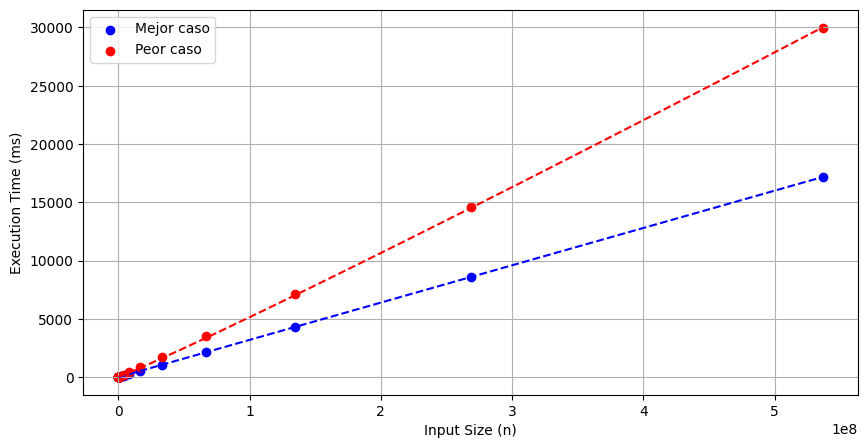

In [2]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

sizes_mejor, times_mejor = np.loadtxt("mejorcaso.txt", unpack=True)
sizes_peor, times_peor = np.loadtxt("peorcaso.txt", unpack=True)

# Define fitting functions
def linear_fit(n, a, b):
    return a * n + b

def nlog_fit(n, a, b):
    return a * n * np.log(n) + b

# Fit the data
lin_params, _ = curve_fit(linear_fit, sizes_mejor, times_mejor)
nlog_params, _ = curve_fit(nlog_fit, sizes_peor, times_peor)

# Generate smooth curves
smooth_sizes = np.linspace(min(sizes_mejor), max(sizes_mejor), 100)
lin_fit_values = linear_fit(smooth_sizes, *lin_params)
nlog_fit_values = nlog_fit(smooth_sizes, *nlog_params)

# Plot results
plt.figure(figsize=(10, 5))
plt.scatter(sizes_mejor, times_mejor, label='Mejor caso', marker='o', color='blue')
plt.scatter(sizes_peor, times_peor, label='Peor caso', marker='o', color='red')

plt.plot(smooth_sizes, lin_fit_values, linestyle='--', color='blue')
plt.plot(smooth_sizes, nlog_fit_values, linestyle='--', color='red')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (ms)')
plt.legend()
plt.grid()
plt.show()